<a href="https://colab.research.google.com/github/KarivetiKeerthi/Scaler-Projects/blob/main/Walmart_Business_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install numpy

In [ ]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.isnull().sum()/len(df)*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

In [ ]:
df.isna().sum().sum()

0

In [ ]:
unique_attributes = df.nunique()
unique_attributes

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [ ]:
df['Age'].value_counts(normalize=True)*100

26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64

In [ ]:
df['Gender'].value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

In [ ]:
df['City_Category'].value_counts(normalize=True)*100

B    42.026259
C    31.118880
A    26.854862
Name: City_Category, dtype: float64

In [ ]:
df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100

1     35.235825
2     18.513711
3     17.322404
4+    15.402823
0     13.525237
Name: Stay_In_Current_City_Years, dtype: float64

In [ ]:
df['Marital_Status'].value_counts(normalize=True)*100

0    59.034701
1    40.965299
Name: Marital_Status, dtype: float64

In [ ]:
df['Product_Category'].value_counts(normalize=True)*100

5     27.438971
1     25.520118
8     20.711076
11     4.415272
2      4.338373
6      3.720631
3      3.674637
4      2.136645
16     1.786688
15     1.143495
13     1.008784
10     0.931703
12     0.717548
7      0.676462
18     0.568112
20     0.463579
19     0.291419
14     0.276875
17     0.105078
9      0.074536
Name: Product_Category, dtype: float64

<Axes: ylabel='Gender'>

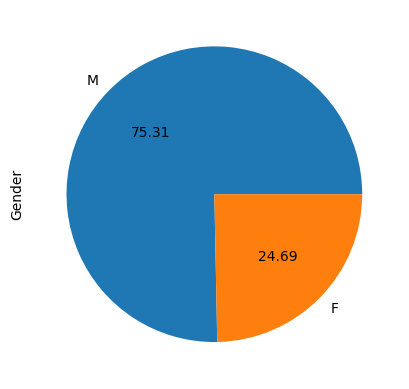

In [ ]:
df['Gender'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='Marital_Status'>

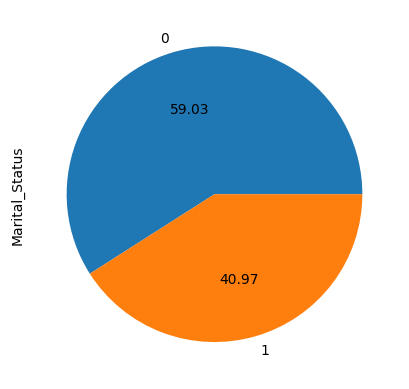

In [ ]:
df['Marital_Status'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='Age'>

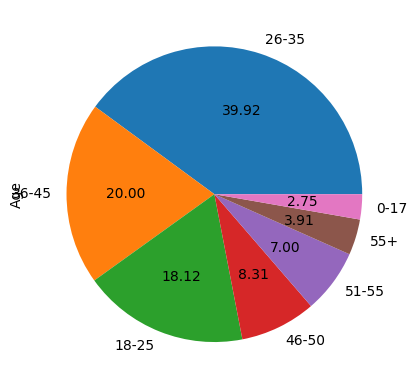

In [ ]:
df['Age'].value_counts().plot(kind='pie',autopct='%.2f')

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


<ipython-input-32-479c215d4cda>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Product_Category'],kde=False, color='green', bins=15)


<Axes: xlabel='Product_Category'>

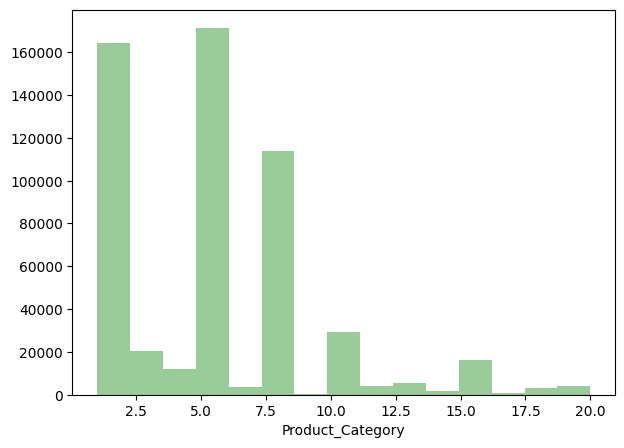

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(df['Product_Category'],kde=False, color='green', bins=15)

<ipython-input-25-ac5e974327ff>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Occupation'],kde=False, color='red', bins=30)


<Axes: xlabel='Occupation'>

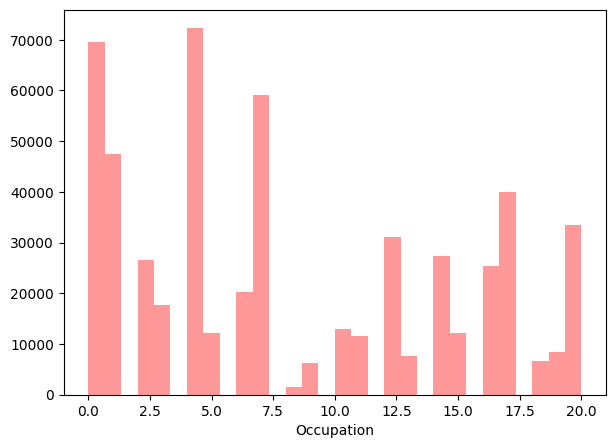

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(df['Occupation'],kde=False, color='red', bins=30)

Text(0.5, 1.0, 'Age-Gender Count Plot')

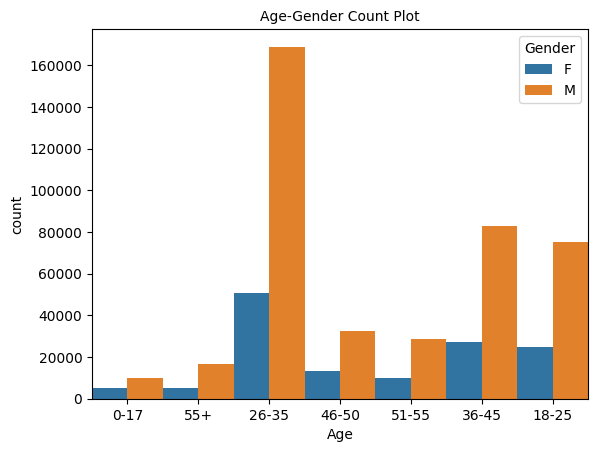

In [ ]:
sns.countplot(x='Age', hue='Gender', width=1, data=df)
plt.title('Age-Gender Count Plot', size= 10)

Text(0.5, 1.0, 'Occupation-Gender Count Plot')

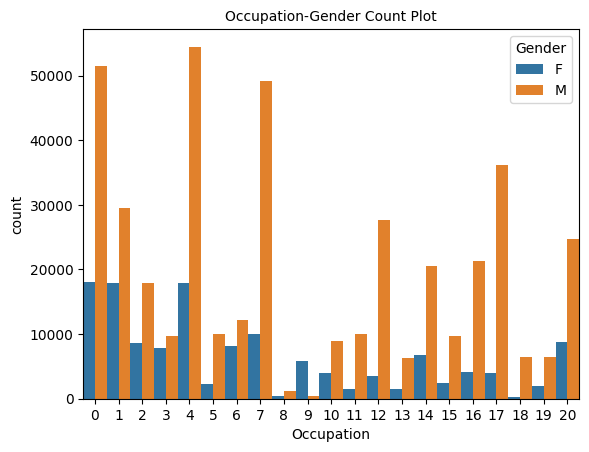

In [ ]:
sns.countplot(x='Occupation', hue='Gender', width=1, data=df)
plt.title('Occupation-Gender Count Plot', size= 10)

Text(0.5, 1.0, 'Product_category-Gender Count Plot')

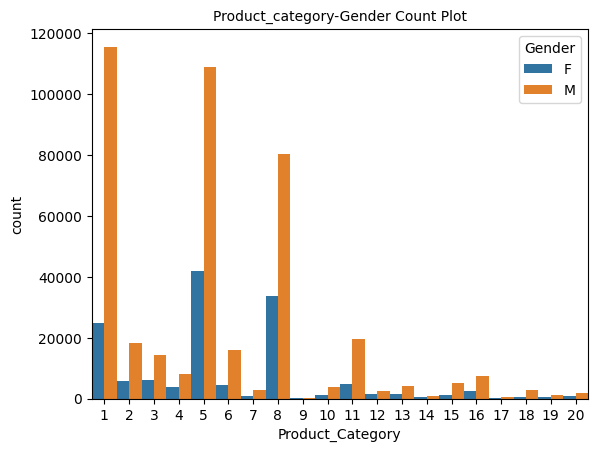

In [ ]:
sns.countplot(x='Product_Category', hue='Gender', width=1, data=df)
plt.title('Product_category-Gender Count Plot', size= 10)

Text(0.5, 1.0, 'City_Category-Age Count Plot')

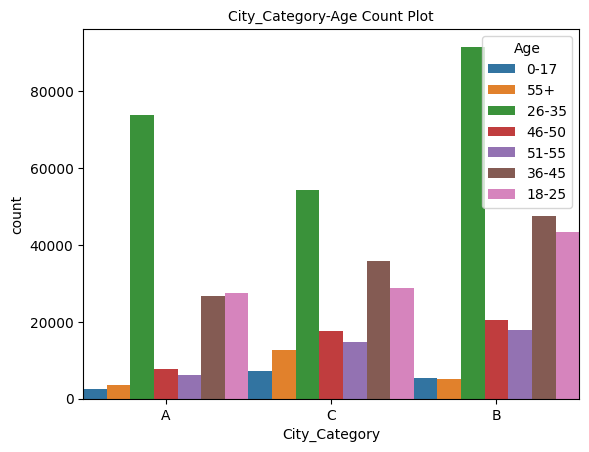

In [ ]:
sns.countplot(x='City_Category', hue='Age', width=1, data=df)
plt.title('City_Category-Age Count Plot', size= 10)

Text(0.5, 1.0, 'Product_Category-Age Count Plot')

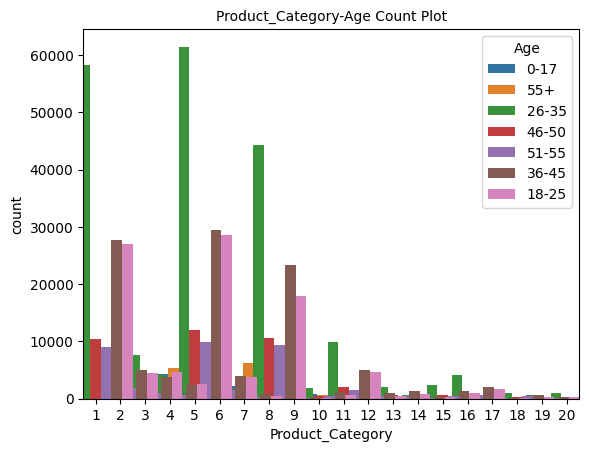

In [ ]:
sns.countplot(x='Product_Category', hue='Age', width=3, data=df)
plt.title('Product_Category-Age Count Plot', size= 10)

Text(0.5, 1.0, 'Occupation-Gender')

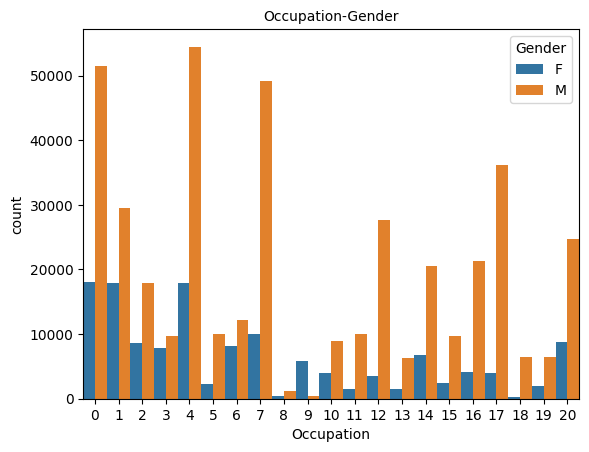

In [ ]:
sns.countplot(x='Occupation', hue='Gender', width=1, data=df)
plt.title('Occupation-Gender', size= 10)

Text(0.5, 1.0, 'Age-Marital_Status HistPlot')

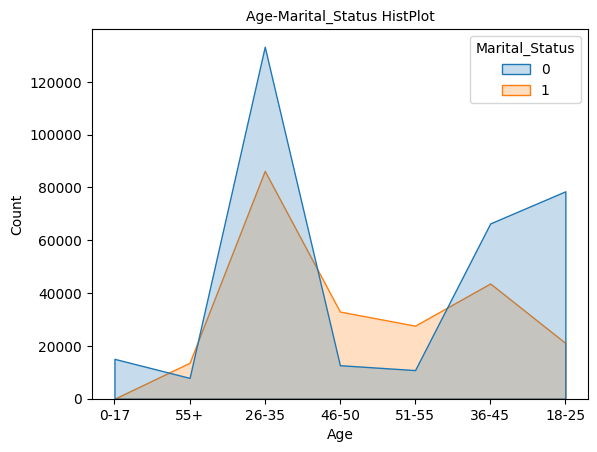

In [ ]:
sns.histplot(data = df,x ='Age',hue = 'Marital_Status',element = 'poly')
plt.title('Age-Marital_Status HistPlot', size= 10)

Text(0.5, 1.0, 'Age-Gender HistPlot')

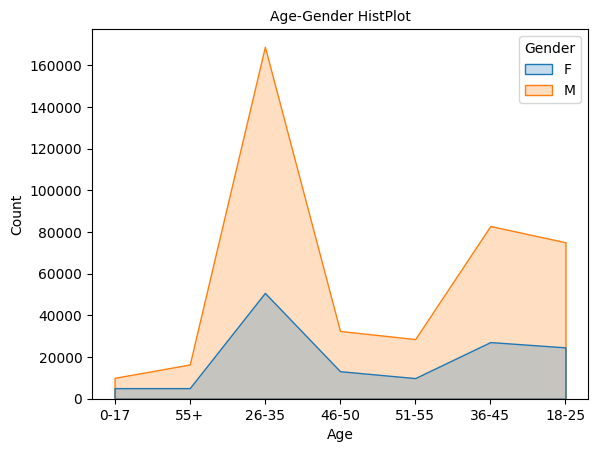

Text(0.5, 1.0, 'Age-Gender HistPlot')

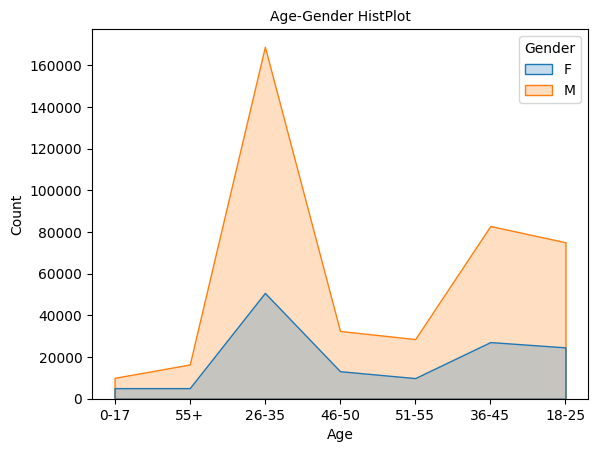

In [ ]:
sns.histplot(data = df,x ='Age',hue = 'Gender',element = 'poly')
plt.title('Age-Gender HistPlot', size= 10)

Text(0.5, 1.0, 'Product_Category-Gender HistPlot')

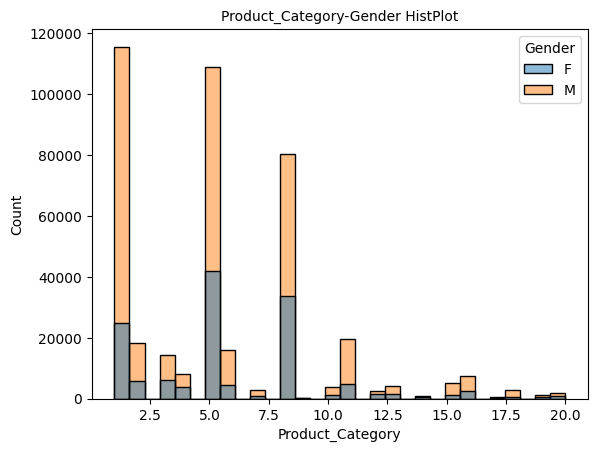

In [ ]:
sns.histplot(data = df,x ='Product_Category',hue = 'Gender',bins=30)
plt.title('Product_Category-Gender HistPlot', size= 10)

Text(0.5, 1.0, 'Occupation-Age HistPlot')

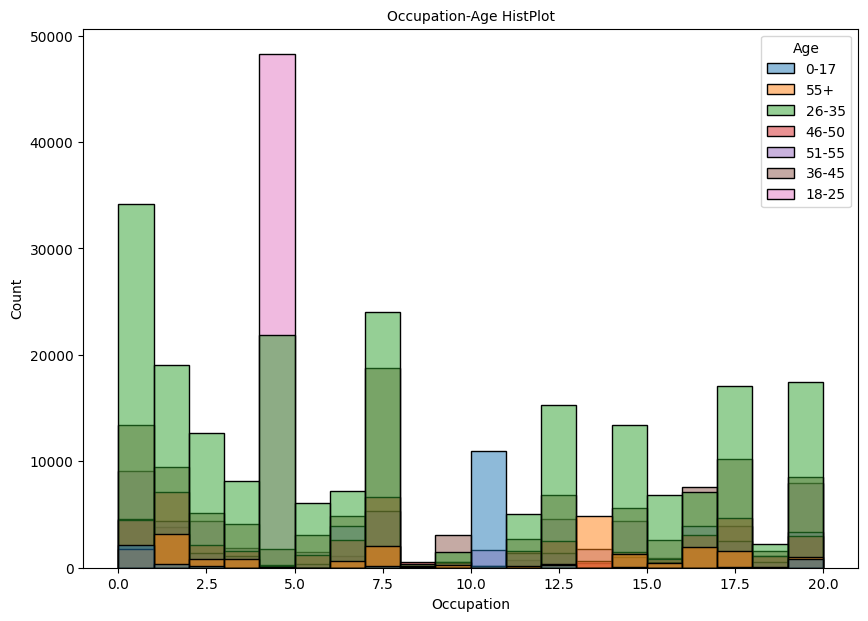

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data = df,x = 'Occupation',hue = 'Age',bins=20)
plt.title('Occupation-Age HistPlot', size= 10)

Text(0.5, 1.0, 'Age-Product_Category BoxPlot')

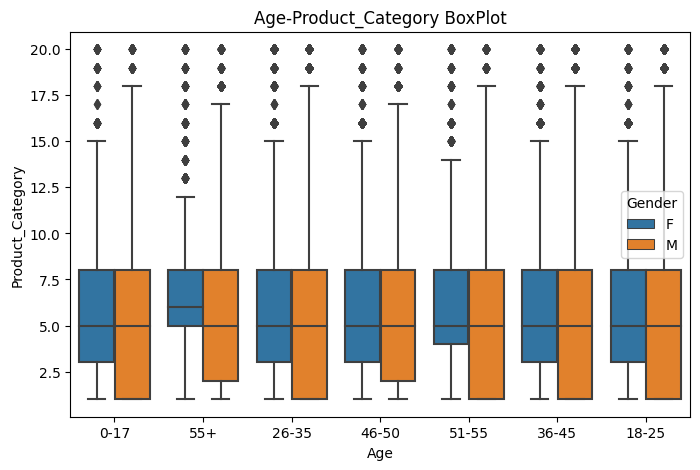

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x = 'Age', y = 'Product_Category', hue='Gender')
plt.title('Age-Product_Category BoxPlot', size= 12)

Text(0.5, 1.0, 'Age-Purchase BoxPlot')

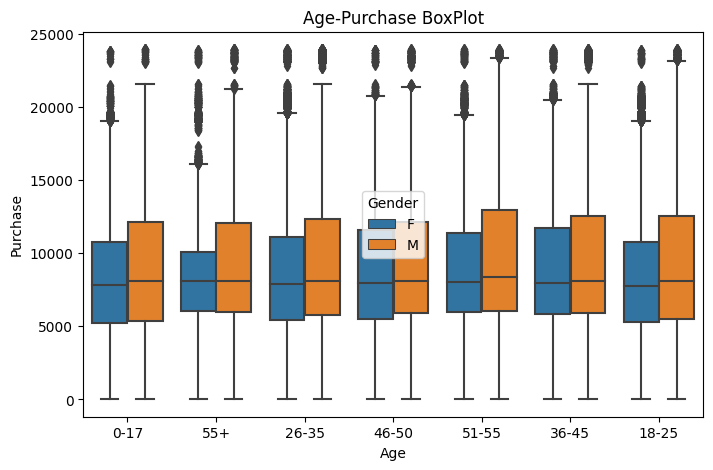

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x = 'Age', y = 'Purchase', hue='Gender')
plt.title('Age-Purchase BoxPlot', size= 12)

Text(0.5, 1.0, 'Occupation-Purchase BoxPlot')

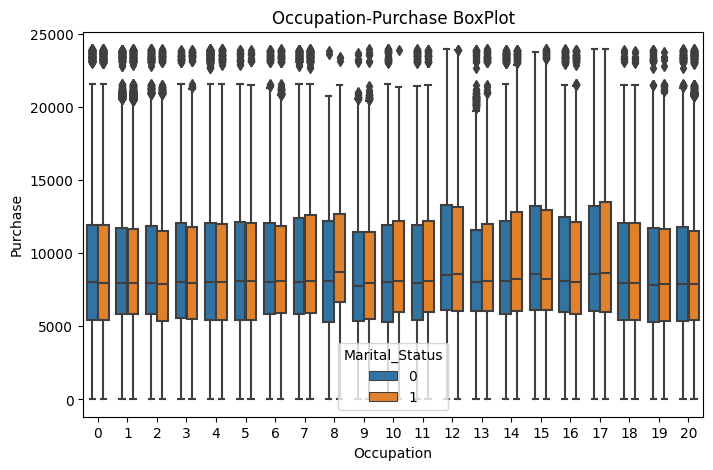

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x = 'Occupation', y = 'Purchase', hue='Marital_Status',width=0.75)
plt.title('Occupation-Purchase BoxPlot', size= 12)

In [ ]:
sns.pairplot(data=df,hue='Gender')

<ipython-input-15-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

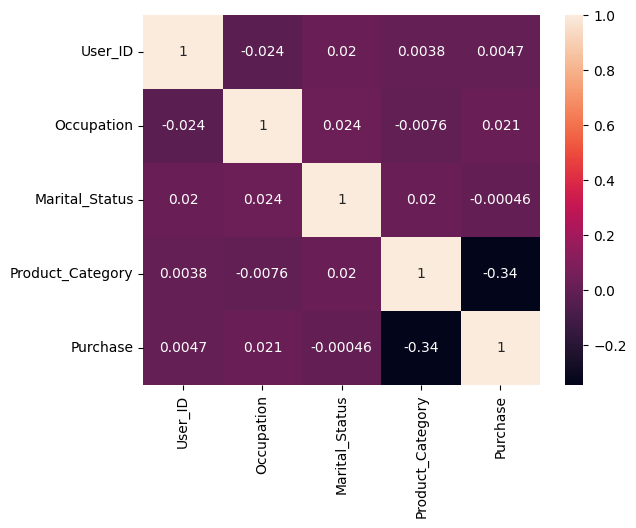

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.isna()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
550063,False,False,False,False,False,False,False,False,False,False
550064,False,False,False,False,False,False,False,False,False,False
550065,False,False,False,False,False,False,False,False,False,False
550066,False,False,False,False,False,False,False,False,False,False


In [ ]:
df[df.isnull().any(axis=1)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


In [ ]:
  df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
prob_purchase = pd.crosstab(index=df['Product_Category'], columns=df['Gender'], values=df['Purchase'], aggfunc='sum', margins=True, normalize='index')
prob_purchase


Gender,F,M
Product_Category,,
1,0.176769,0.823231
2,0.240371,0.759629
3,0.302019,0.697981
4,0.326262,0.673738
5,0.281003,0.718997
6,0.219355,0.780645
7,0.253878,0.746122
8,0.294600,0.705400
9,0.172786,0.827214


In [ ]:
pd.crosstab(index=df['Age'], columns=df['Gender'], values=df['Marital_Status'], aggfunc='sum', margins=True, normalize='index')

Gender,F,M
Age,,
0-17,0.000000,0.000000
18-25,0.296979,0.703021
26-35,0.239585,0.760415
36-45,0.241108,0.758892
46-50,0.303929,0.696071
51-55,0.228255,0.771745
55+,0.233096,0.766904
All,0.252901,0.747099


In [ ]:
pd.crosstab(index=df['Product_Category'], columns=df['Age'], values=df['Occupation'], aggfunc='sum', margins=True, normalize='index')

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Product_Category,,,,,,,
1,0.027251,0.162306,0.404040,0.215008,0.081358,0.070798,0.039238
2,0.036176,0.152121,0.363279,0.226762,0.094798,0.085060,0.041805
3,0.068004,0.191883,0.381832,0.205675,0.071583,0.055411,0.025611
4,0.075859,0.176065,0.346982,0.220341,0.086176,0.063925,0.030652
5,0.031842,0.156704,0.400412,0.215668,0.082108,0.072529,0.040736
6,0.020053,0.155456,0.407860,0.208360,0.082189,0.076249,0.049833
7,0.014945,0.099723,0.448317,0.223197,0.096755,0.079549,0.037514
8,0.019991,0.129208,0.378033,0.221960,0.097699,0.087653,0.065456
9,0.034032,0.131500,0.354206,0.294582,0.099918,0.063708,0.022053


In [ ]:
pd.crosstab(index=df['Product_Category'], columns=df['Age'], values=df['Purchase'], aggfunc='mean', margins=True, normalize='index')

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Product_Category,,,,,,,
1,0.141379,0.139730,0.139807,0.143036,0.143151,0.146763,0.146133
2,0.135922,0.137359,0.138827,0.142484,0.143776,0.149069,0.152563
3,0.133678,0.139918,0.143930,0.146559,0.145444,0.146377,0.144094
4,0.136591,0.133530,0.142404,0.146075,0.147262,0.148842,0.145297
5,0.141421,0.139005,0.139778,0.142184,0.144198,0.147143,0.146271
6,0.143118,0.141200,0.141111,0.141511,0.142525,0.145305,0.145229
7,0.135545,0.140550,0.142986,0.143947,0.145425,0.143298,0.148249
8,0.143617,0.139005,0.139250,0.141657,0.141733,0.146239,0.148500
9,0.139193,0.154459,0.141347,0.132471,0.133102,0.131454,0.167974


In [ ]:
df['Gender'].sample(20)

163496    M
314676    F
142657    M
88317     M
435152    M
229435    F
246817    M
1710      M
444527    M
210161    M
89374     M
111621    F
88950     M
125029    F
82832     F
38158     M
252945    M
141831    M
74568     F
80689     M
Name: Gender, dtype: object

<Axes: ylabel='Count'>

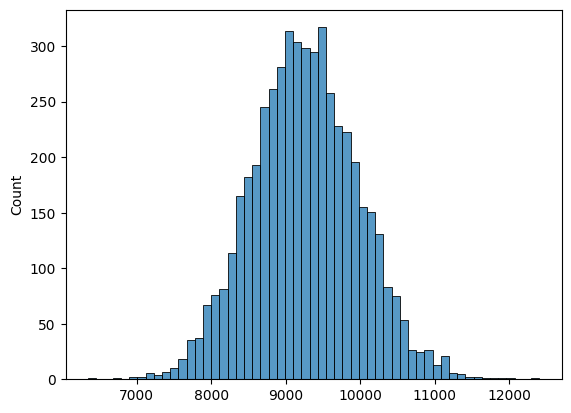

In [ ]:
sample_50=[np.mean(df['Purchase'].sample(50)) for i in range(5000)]
sns.histplot(sample_50)

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm

In [ ]:
description=df["Purchase"].describe()
description

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [ ]:
norm.cdf(x=data_mean,loc=data_mean,scale=data_std)

0.5

In [ ]:
data_right_first_std=data_mean+data_std
data_right_first_std

14287.034106779709

In [ ]:
data_left_first_std=data_mean-data_std
data_left_first_std

4240.903319138543

In [ ]:
z_score=norm.ppf(0.95)
z_score

1.6448536269514722

In [ ]:
x=(z_score*data_std)+data_mean
x

17526.176044399333

In [ ]:
sigma=df["Purchase"].std()
sigma

5023.065393820582

In [ ]:
mu=df["Purchase"].mean()
mu

9263.968712959126

In [ ]:
description=df["Gender"].describe()
description

count     550068
unique         2
top            M
freq      414259
Name: Gender, dtype: object

Text(0.5, 1.0, 'Age-Purchase HistPlot')

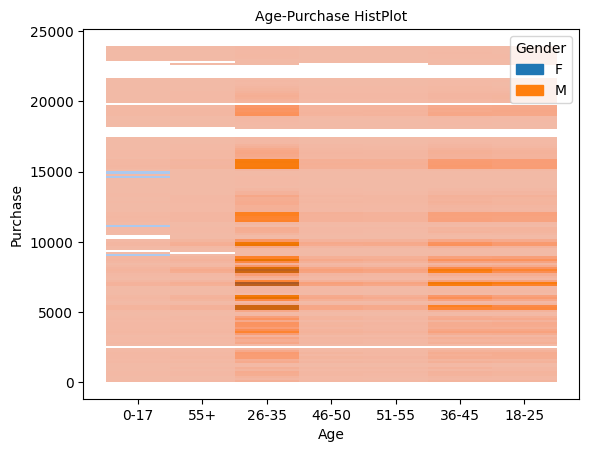

In [ ]:
sns.histplot(data = df,x ='Age',y = 'Purchase',hue = 'Gender', element='poly')
plt.title('Age-Purchase HistPlot', size= 10)

In [ ]:
norm.cdf(x=23961,loc=9263.96,scale=5023.06)

0.9982827689430717

In [ ]:
customer_std = df['Purchase'].std(ddof=0)
print('Customer standard deviation: ', population_std)

Customer standard deviation:  5023.060827959928


In [ ]:
Mean_F=df[df['Gender']=='F'].Purchase.mean()
Mean_F

8734.565765155476

In [ ]:
Mean_M=df[df['Gender']=='M'].Purchase.mean()
Mean_M

9437.526040472265

In [ ]:
z_score= (df["Purchase"]-df["Purchase"].mean())/df["Purchase"].std()
z_score

0        -0.177973
1         1.181755
2        -1.561192
3        -1.633857
4        -0.257804
            ...   
550063   -1.771024
550064   -1.770427
550065   -1.817012
550066   -1.771621
550067   -1.746736
Name: Purchase, Length: 550068, dtype: float64

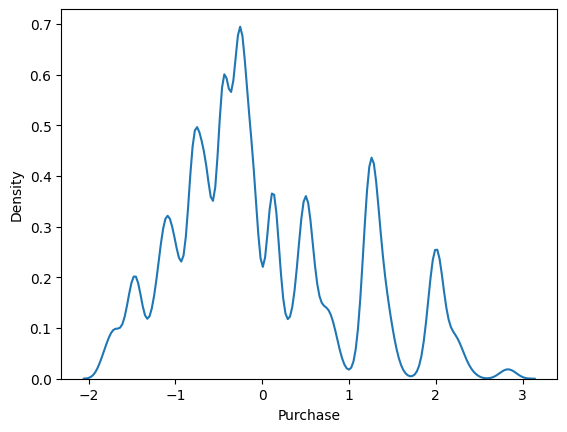

In [ ]:
sns.kdeplot(z_score)
plt.show()

In [ ]:
std_error_Female= Mean_F/np.sqrt(100)
std_error_Female

873.4565765155476

In [ ]:
std_error_male= Mean_M/np.sqrt(100)
std_error_male

943.7526040472264

In [ ]:
z1=norm.ppf(0.025)
z1

-1.9599639845400545

In [ ]:
z2=norm.ppf(0.975)
z2

1.959963984540054

In [ ]:
CI_95_Female = norm.interval(0.95,loc=Mean_F,scale=std_error_Female)
CI_95_Female

(7022.622333125349, 10446.509197185604)

In [ ]:
CI_95_Male = norm.interval(0.95,loc=Mean_M,scale=std_error_male)
CI_95_Male

(7587.804926223811, 11287.247154720719)

In [ ]:
CI_90_Female = norm.interval(0.90,loc=Mean_F,scale=std_error_Female)
CI_90_Female

(7297.857547289261, 10171.27398302169)

In [ ]:
CI_99_Female = norm.interval(0.99,loc=Mean_F,scale=std_error_Female)
CI_99_Female

(6484.690719989227, 10984.440810321725)

In [ ]:
CI_90_Male = norm.interval(0.90,loc=Mean_M,scale=std_error_male)
CI_90_Male

(7885.191146760288, 10989.860934184242)

In [ ]:
CI_99_Male = norm.interval(0.99,loc=Mean_M,scale=std_error_male)
CI_99_Male

(7006.580427666837, 11868.471653277693)

In [ ]:
Mean_Married = df[df['Marital_Status']== 1].Purchase.mean()
Mean_Married

9261.174574082374

In [ ]:
std_error_Married = Mean_Married/np.sqrt(100)
std_error_Married

926.1174574082373

In [ ]:
CI_90_Married = norm.interval(0.90,loc=Mean_Married,scale=std_error_Married)
CI_90_Married

(7737.846915281358, 10784.502232883387)

In [ ]:
CI_95_Married = norm.interval(0.95,loc=Mean_Married,scale=std_error_Married)
CI_95_Married

(7446.017712108421, 11076.331436056325)

In [ ]:
CI_99_Married = norm.interval(0.99,loc=Mean_Married,scale=std_error_Married)
CI_99_Married

(6875.654088762035, 11646.695059402711)

In [ ]:
Mean_Single = df[df['Marital_Status']== 0].Purchase.mean()
Mean_Single

9265.907618921507

In [ ]:
std_error_Single = Mean_Single/np.sqrt(100)
std_error_Single

926.5907618921507

In [ ]:
CI_90_Single = norm.interval(0.90,loc=Mean_Single,scale=std_error_Single)
CI_90_Single

(7741.8014435234745, 10790.013794319539)

In [ ]:
CI_95_Single = norm.interval(0.95,loc=Mean_Single,scale=std_error_Single)
CI_95_Single

(7449.8230972053625, 11081.99214063765)

In [ ]:
CI_99_Single = norm.interval(0.99,loc=Mean_Single,scale=std_error_Single)
CI_99_Single

(6879.167982042003, 11652.64725580101)

In [ ]:
Mean_Age1 = df[df['Age']== '0-17'].Purchase.mean()
Mean_Age1

8933.464640444974

In [ ]:
std_error_Age1 = Mean_Age1/np.sqrt(100)
std_error_Age1

893.3464640444975

In [ ]:
CI_90_Age1 = norm.interval(0.90,loc=Mean_Age1,scale=std_error_Age1)
CI_90_Age1

(7464.040468937109, 10402.888811952838)

In [ ]:
CI_95_Age1 = norm.interval(0.95,loc=Mean_Age1,scale=std_error_Age1)
CI_95_Age1

(7182.537745201553, 10684.391535688395)

In [ ]:
CI_99_Age1 = norm.interval(0.99,loc=Mean_Age1,scale=std_error_Age1)
CI_99_Age1

(6632.356640137363, 11234.572640752585)

In [ ]:
Mean_Age2 = df[df['Age']== '18-25'].Purchase.mean()
Mean_Age2

9169.663606261289

In [ ]:
std_error_Age2 = Mean_Age2/np.sqrt(100)
std_error_Age2

916.9663606261289

In [ ]:
CI_90_Age2 = norm.interval(0.90,loc=Mean_Age2,scale=std_error_Age2)
CI_90_Age2

(7661.388162192909, 10677.939050329669)

In [ ]:
CI_95_Age2 = norm.interval(0.95,loc=Mean_Age2,scale=std_error_Age2)
CI_95_Age2

(7372.442564399309, 10966.884648123269)

In [ ]:
CI_99_Age2 = norm.interval(0.99,loc=Mean_Age2,scale=std_error_Age2)
CI_99_Age2

(6807.714784191918, 11531.61242833066)

In [ ]:
Mean_Age3 = df[df['Age']== '26-35'].Purchase.mean()
Mean_Age3

9252.690632869888

In [ ]:
std_error_Age3 = Mean_Age3/np.sqrt(100)
std_error_Age3

925.2690632869887

In [ ]:
CI_90_Age3 = norm.interval(0.90,loc=Mean_Age3,scale=std_error_Age3)
CI_90_Age3

(7730.758458216293, 10774.622807523483)

In [ ]:
CI_95_Age3 = norm.interval(0.95,loc=Mean_Age3,scale=std_error_Age3)
CI_95_Age3

(7439.196592818278, 11066.184672921498)

In [ ]:
CI_99_Age3 = norm.interval(0.99,loc=Mean_Age3,scale=std_error_Age3)
CI_99_Age3

(6869.35546598802, 11636.025799751755)

In [ ]:
Mean_Age4 = df[df['Age']== '36-45'].Purchase.mean()
Mean_Age4

9331.350694917874

In [ ]:
std_error_Age4 = Mean_Age4/np.sqrt(100)
std_error_Age4

933.1350694917874

In [ ]:
CI_90_Age4 = norm.interval(0.90,loc=Mean_Age4,scale=std_error_Age4)
CI_90_Age4

(7796.4800914286925, 10866.221298407054)

In [ ]:
CI_95_Age4 = norm.interval(0.95,loc=Mean_Age4,scale=std_error_Age4)
CI_95_Age4

(7502.439566002689, 11160.261823833058)

In [ ]:
CI_99_Age4 = norm.interval(0.99,loc=Mean_Age4,scale=std_error_Age4)
CI_99_Age4

(6927.754038751788, 11734.94735108396)

In [ ]:
Mean_Age5 = df[df['Age']== '46-50'].Purchase.mean()
Mean_Age5

9208.625697468327

In [ ]:
std_error_Age5 = Mean_Age5/np.sqrt(100)
std_error_Age5

920.8625697468327

In [ ]:
CI_90_Age5 = norm.interval(0.90,loc=Mean_Age5,scale=std_error_Age5)
CI_90_Age5

(7693.941559696395, 10723.309835240258)

In [ ]:
CI_95_Age5 = norm.interval(0.95,loc=Mean_Age5,scale=std_error_Age5)
CI_95_Age5

(7403.768226053531, 11013.483168883124)

In [ ]:
CI_99_Age5 = norm.interval(0.99,loc=Mean_Age5,scale=std_error_Age5)
CI_99_Age5

(6836.6409057730925, 11580.610489163562)

In [ ]:
Mean_Age6 = df[df['Age']== '51-55'].Purchase.mean()
Mean_Age6

9534.808030960236

In [ ]:
std_error_Age6 = Mean_Age6/np.sqrt(100)
std_error_Age6

953.4808030960236

In [ ]:
CI_90_Age6 = norm.interval(0.90,loc=Mean_Age6,scale=std_error_Age6)
CI_90_Age6

(7966.471673759138, 11103.144388161332)

In [ ]:
CI_95_Age6 = norm.interval(0.95,loc=Mean_Age6,scale=std_error_Age6)
CI_95_Age6

(7666.019996941703, 11403.596064978768)

In [ ]:
CI_99_Age6 = norm.interval(0.99,loc=Mean_Age6,scale=std_error_Age6)
CI_99_Age6

(7078.804237974158, 11990.811823946313)

In [ ]:
Mean_Age7 = df[df['Age']== '55+'].Purchase.mean()
Mean_Age7

9336.280459449405

In [ ]:
std_error_Age7 = Mean_Age7/np.sqrt(100)
std_error_Age7

933.6280459449405

In [ ]:
CI_90_Age7 = norm.interval(0.90,loc=Mean_Age7,scale=std_error_Age7)
CI_90_Age7

(7800.598981853253, 10871.961937045555)

In [ ]:
CI_95_Age7 = norm.interval(0.95,loc=Mean_Age7,scale=std_error_Age7)
CI_95_Age7

(7506.4031144408145, 11166.157804457995)

In [ ]:
CI_99_Age7 = norm.interval(0.99,loc=Mean_Age7,scale=std_error_Age7)
CI_99_Age7

(6931.413980089328, 11741.146938809481)